<a href="https://colab.research.google.com/github/GusdPaula/postgraduation_fiap/blob/main/tech_challenge_fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
# Importando libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams["axes.formatter.limits"] = (-99, 99)

In [290]:
# Lendo a base dados de exportação de vinho de mesa
exportacao_vinho_mesa = pd.read_csv('/content/drive/MyDrive/pos_fiap/ExpVinho.csv', sep=';', header=None)
del exportacao_vinho_mesa[0]
exportacao_vinho_mesa

,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,101
0,África do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26.0,95
1,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,10680,44780,14012,68109,15467,87702,10794,45382,3660.0,25467
2,Angola,0,0,0,0,0,0,0,0,0,...,1908,17089,7359,35390,10170,61680,477,709,345.0,1065
3,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
4,Antígua e Barbuda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37,191,219.0,1549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,Tunísia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
103,Turquia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,360,150,115.0,209
104,Uruguai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7711,29617,6180.0,18497
105,Venezuela,0,0,3200,2000,1350,750,11700,6458,9830,...,0,0,0,0,680,2646,71,355,0.0,0


In [291]:
# Configurando variáveis para ajustart colunas
columns = list()
ano = 1970

In [292]:
# Ajustando colunas
for col in exportacao_vinho_mesa.columns:
    if col == 1:
        new_col = 'pais'

    elif int(col) % 2 == 0:
        new_col = f'litros_{ano}'

    else:
        new_col = f'valor_dolar_{ano}'
        ano +=1

    columns.append(new_col)


In [293]:
# Obtendo os útimos 15 anos
exportacao_vinho_mesa.columns = columns
pais = exportacao_vinho_mesa['pais']
exportacao_vinho_mesa = exportacao_vinho_mesa.iloc[:,-30:]
exportacao_vinho_mesa = pd.concat([pais, exportacao_vinho_mesa], axis=1)

In [294]:
exportacao_vinho_mesa = exportacao_vinho_mesa.rename(columns={0:'pais'})
exportacao_vinho_mesa['pais'] = exportacao_vinho_mesa['pais'].str.replace('Alemanha, República Democrática', 'Alemanha')

In [295]:
exportacao_vinho_mesa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pais              107 non-null    object 
 1   litros_2005       107 non-null    int64  
 2   valor_dolar_2005  107 non-null    int64  
 3   litros_2006       107 non-null    int64  
 4   valor_dolar_2006  107 non-null    int64  
 5   litros_2007       107 non-null    int64  
 6   valor_dolar_2007  107 non-null    int64  
 7   litros_2008       107 non-null    int64  
 8   valor_dolar_2008  107 non-null    int64  
 9   litros_2009       107 non-null    int64  
 10  valor_dolar_2009  107 non-null    int64  
 11  litros_2010       107 non-null    int64  
 12  valor_dolar_2010  107 non-null    int64  
 13  litros_2011       107 non-null    int64  
 14  valor_dolar_2011  107 non-null    int64  
 15  litros_2012       107 non-null    int64  
 16  valor_dolar_2012  107 non-null    int64  
 1

In [296]:
# Definindo colunas para soma
cols_to_sum_litros = [col for col in exportacao_vinho_mesa.columns if 'litros' in col]
cols_to_sum_valor = [col for col in exportacao_vinho_mesa.columns if 'valor' in col]

In [297]:
# Consolidando informaçãos para uma tabela
exportacao_vinho_mesa['litros_15_anos'] = exportacao_vinho_mesa[cols_to_sum_litros].sum(axis=1)
exportacao_vinho_mesa['valor_15_anos'] = exportacao_vinho_mesa[cols_to_sum_valor].sum(axis=1)
exportacao_vinho_mesa_cons = exportacao_vinho_mesa[['pais', 'litros_15_anos', 'valor_15_anos']]
exportacao_vinho_mesa_cons

,pais,litros_15_anos,valor_15_anos
0,África do Sul,26.0,95
1,Alemanha,1107669.0,2895666
2,Angola,218553.0,672513
3,Anguilla,0.0,0
4,Antígua e Barbuda,256.0,1740
...,...,...,...
102,Tunísia,0.0,0
103,Turquia,475.0,359
104,Uruguai,19712.0,74354
105,Venezuela,22494.0,38095


In [298]:
# Obtendo os 10 países que mais exportaram em dólar
dez_paises_por_valor = exportacao_vinho_mesa_cons.sort_values(by='valor_15_anos', ascending=False).iloc[:10]

In [299]:
# Obtendo os 10 países que mais exportaram em litros
dez_paises_por_litro = exportacao_vinho_mesa_cons.sort_values(by='litros_15_anos', ascending=False).iloc[:10]

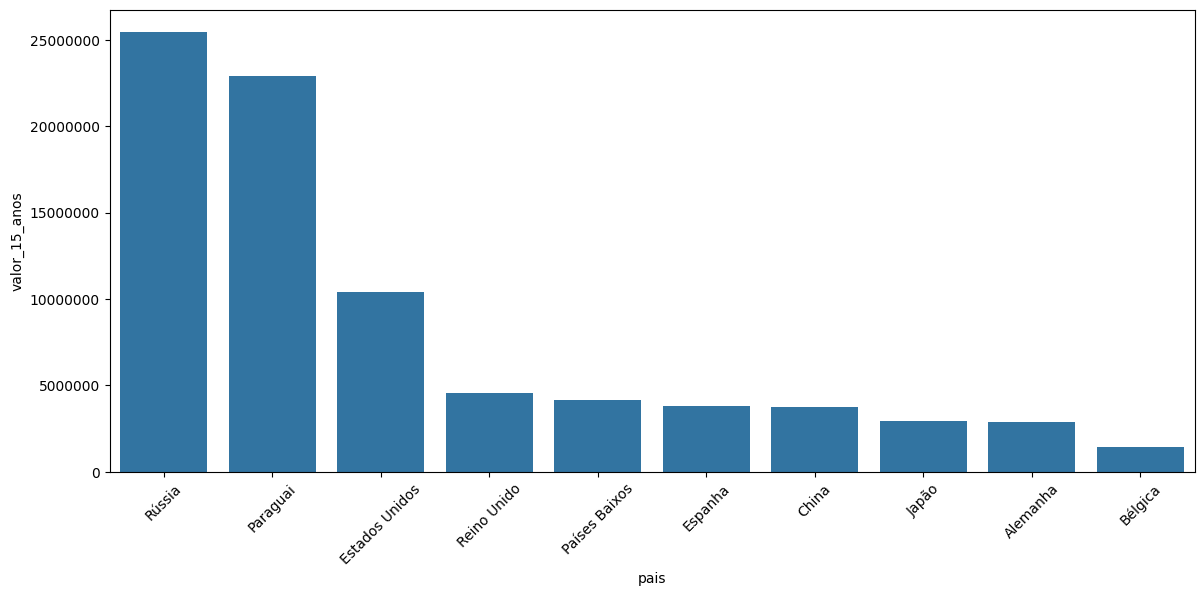

In [300]:
# Explorando dados do valor exportado
plt.figure(figsize=(14,6))
sns.barplot(data=dez_paises_por_valor, x='pais', y='valor_15_anos')
plt.xticks(rotation=45)
plt.show()

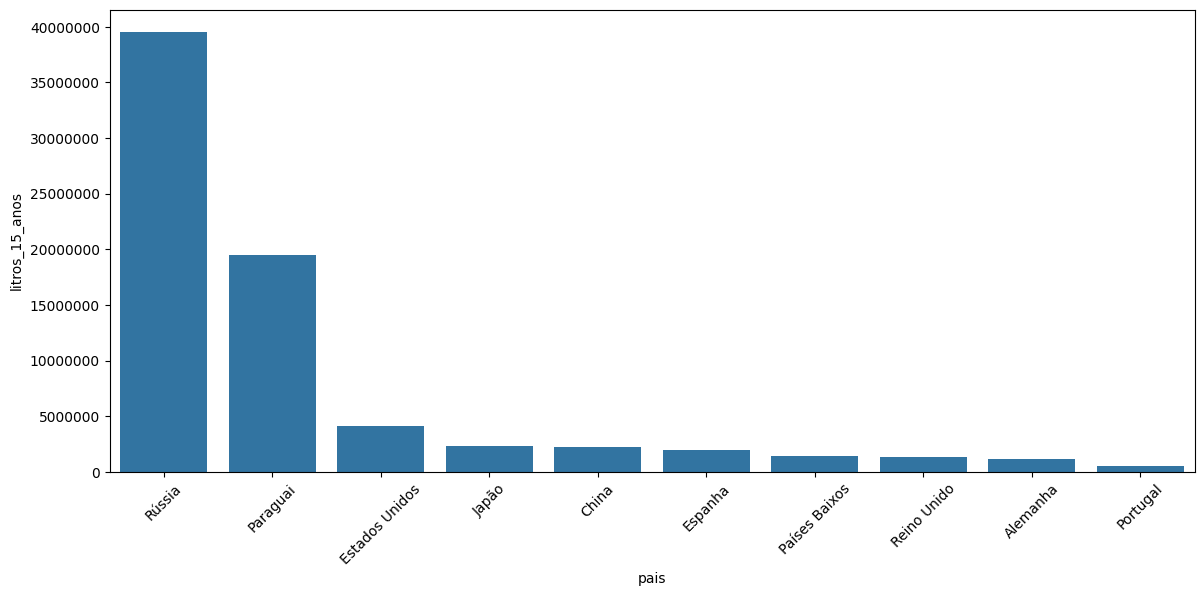

In [301]:
# Explorando dados dos litros exportado
plt.figure(figsize=(14,6))
sns.barplot(data=dez_paises_por_litro, x='pais', y='litros_15_anos')
plt.xticks(rotation=45)
plt.show()

# Provavelmente existe este delta por conta do câmbio... será preciso encontrar um mode de normalizar isto.

##Tendência litros

In [302]:
# Criando df para analizar tendência por litro
cols_to_sum_litros.insert(0, 'pais')
cols_to_sum_litros.insert(1, 'litros_15_anos')
exportacao_vinho_mesa_litros = exportacao_vinho_mesa[cols_to_sum_litros]
dez_paises_por_litro = exportacao_vinho_mesa_litros.sort_values(by='litros_15_anos', ascending=False).iloc[:10]

dez_paises_por_litro

,pais,litros_15_anos,litros_2005,litros_2006,litros_2007,litros_2008,litros_2009,litros_2010,litros_2011,litros_2012,litros_2013,litros_2014,litros_2015,litros_2016,litros_2017,litros_2018,litros_2019
89,Rússia,39558559.0,177600,334200,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0.0
81,Paraguai,19517034.0,1967909,1947106,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537.0
40,Estados Unidos,4142075.0,338497,392590,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765.0
63,Japão,2312820.0,561411,325031,357943,232293,217974,112178,100835,29281,91988,106426,31597,34341,33909,36992,40621.0
24,China,2227564.0,0,0,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852.0
39,Espanha,1992972.0,0,0,0,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540.0
79,Países Baixos,1424266.0,17688,451,181046,340412,171654,87368,125414,134879,57792,165289,44987,42953,0,9451,44882.0
87,Reino Unido,1301483.0,6102,38281,84613,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295.0
1,Alemanha,1107669.0,57393,38302,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660.0
85,Portugal,547899.0,17741,17732,109074,49090,141000,4577,95,47172,23810,71544,47736,0,0,0,18328.0


In [303]:
dez_paises_por_litro.set_index(dez_paises_por_litro['pais'], inplace=True)
del dez_paises_por_litro['pais']
del dez_paises_por_litro['litros_15_anos']
dez_paises_por_litro

,litros_2005,litros_2006,litros_2007,litros_2008,litros_2009,litros_2010,litros_2011,litros_2012,litros_2013,litros_2014,litros_2015,litros_2016,litros_2017,litros_2018,litros_2019
pais,,,,,,,,,,,,,,,
Rússia,177600,334200,266400,6207658,21912914,0,0,4528176,5893291,190656,47664,0,0,0,0.0
Paraguai,1967909,1947106,1285459,2191901,486927,510989,240168,354824,481564,521847,495428,985739,2393468,3234168,2419537.0
Estados Unidos,338497,392590,479269,443895,372319,228968,306787,146585,245368,222267,195896,258072,132688,169109,209765.0
Japão,561411,325031,357943,232293,217974,112178,100835,29281,91988,106426,31597,34341,33909,36992,40621.0
China,0,0,7638,8689,1553416,795,54156,87905,40929,64040,47609,134106,67594,30835,129852.0
Espanha,0,0,0,2942,2181,0,5206,0,1972980,0,0,0,0,6123,3540.0
Países Baixos,17688,451,181046,340412,171654,87368,125414,134879,57792,165289,44987,42953,0,9451,44882.0
Reino Unido,6102,38281,84613,100097,30092,123624,122629,82937,59161,305807,68382,117044,60711,67708,34295.0
Alemanha,57393,38302,119512,265742,225086,27715,36070,8189,61699,213348,10680,14012,15467,10794,3660.0


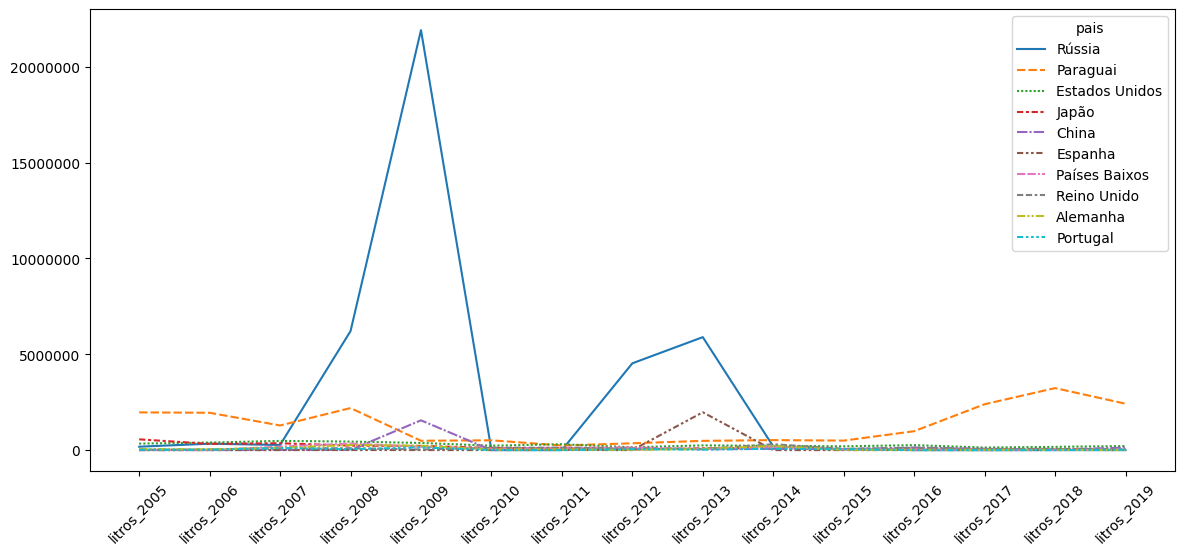

In [304]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.T)
plt.xticks(rotation=45)
plt.show()

In [305]:
dez_paises_por_litro.columns = [col.replace('litros_','') for col in dez_paises_por_litro.columns]

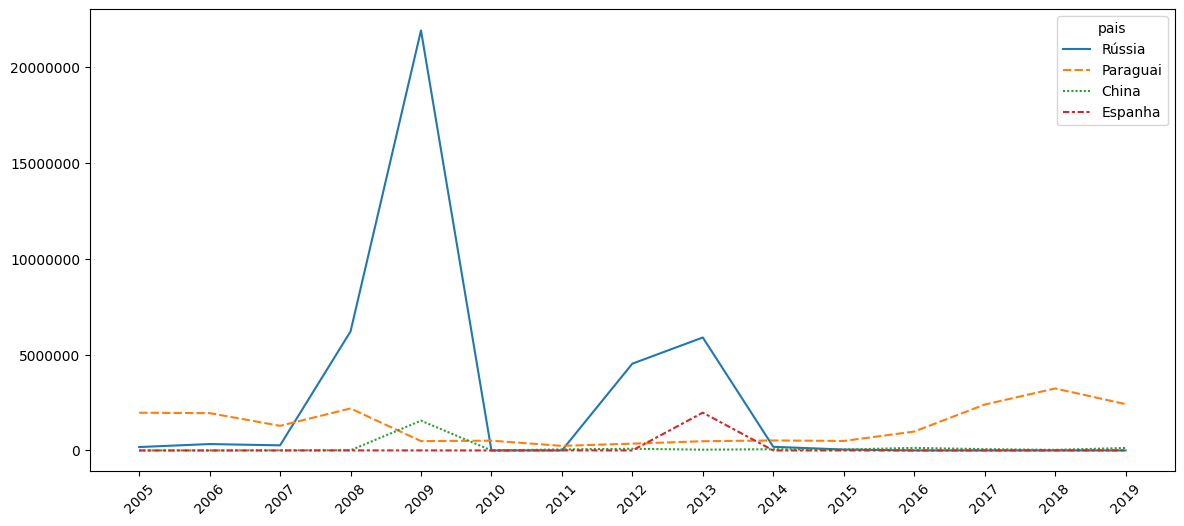

In [306]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.query('index in ["Rússia", "Paraguai", "Espanha", "China"]').T)
plt.xticks(rotation=45)
plt.show()

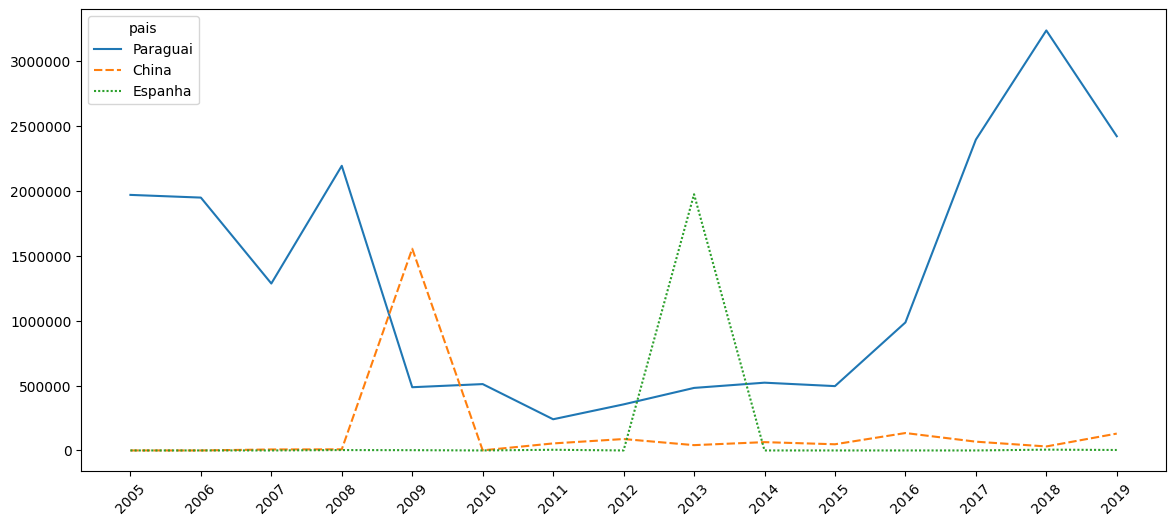

In [307]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.query('index in ["Paraguai", "Espanha", "China"]').T)
plt.xticks(rotation=45)
plt.show()

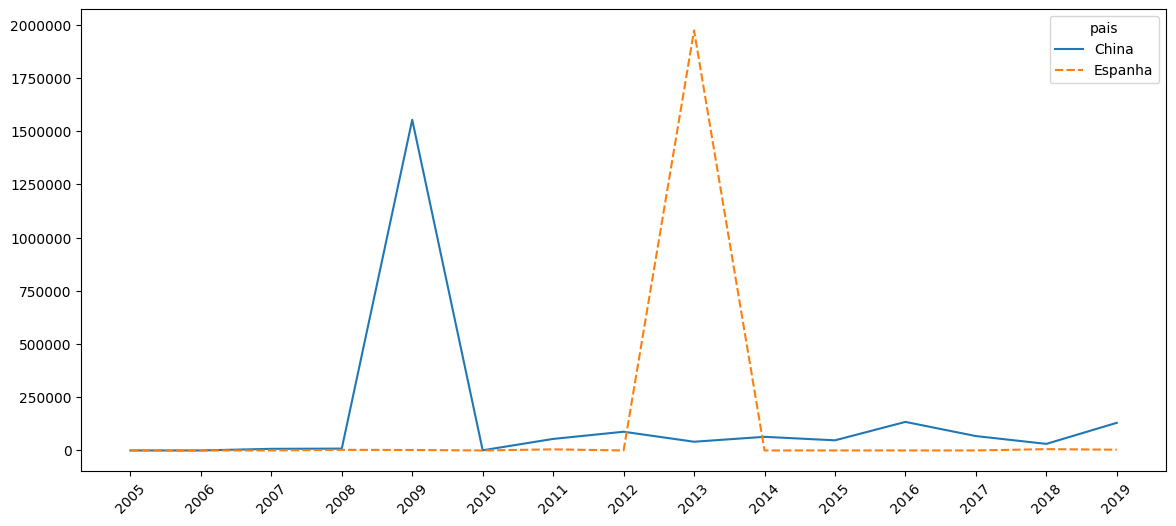

In [308]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.query('index in ["Espanha", "China"]').T)
plt.xticks(rotation=45)
plt.show()

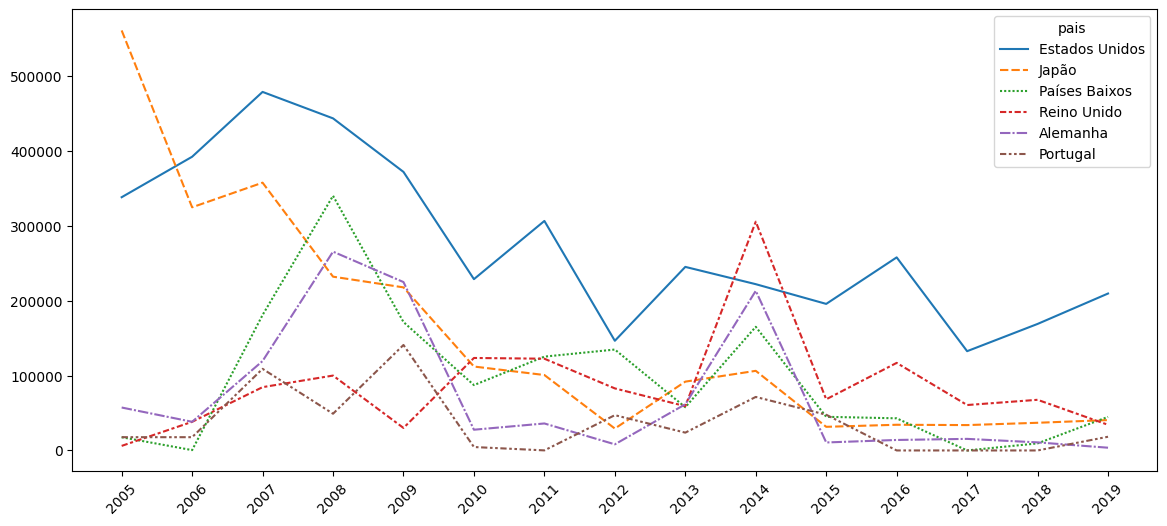

In [309]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_litro.query('index not in ["Rússia", "Paraguai", "Espanha", "China"]').T)
plt.xticks(rotation=45)
plt.show()

##Tendência Valor

In [310]:
# Criando df para analizar tendência por valor
cols_to_sum_valor.insert(0, 'pais')
cols_to_sum_valor.insert(1, 'valor_15_anos')
exportacao_vinho_mesa_valor = exportacao_vinho_mesa[cols_to_sum_valor]
dez_paises_por_valor = exportacao_vinho_mesa_valor.sort_values(by='valor_15_anos', ascending=False).iloc[:10]

dez_paises_por_valor

,pais,valor_15_anos,valor_dolar_2005,valor_dolar_2006,valor_dolar_2007,valor_dolar_2008,valor_dolar_2009,valor_dolar_2010,valor_dolar_2011,valor_dolar_2012,valor_dolar_2013,valor_dolar_2014,valor_dolar_2015,valor_dolar_2016,valor_dolar_2017,valor_dolar_2018,valor_dolar_2019
89,Rússia,25474282,71988,164744,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0
81,Paraguai,22890442,714154,873636,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587
40,Estados Unidos,10412662,588568,591729,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274
87,Reino Unido,4587489,25225,49826,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592
79,Países Baixos,4133389,22385,1898,364751,783635,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031
39,Espanha,3808426,0,0,0,6834,4050,0,24618,0,3748940,0,0,0,0,22631,1353
24,China,3745152,0,0,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828
63,Japão,2919692,249932,240334,316867,178333,283436,74628,144662,116961,429088,401774,87853,90954,92886,112342,99642
1,Alemanha,2895666,106702,89231,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467
13,Bélgica,1450165,28743,52799,3751,12969,58764,185411,62339,90718,95893,704093,26399,46534,16405,52799,12548


In [311]:
dez_paises_por_valor.set_index(dez_paises_por_valor['pais'], inplace=True)
del dez_paises_por_valor['pais']
del dez_paises_por_valor['valor_15_anos']
dez_paises_por_valor

,valor_dolar_2005,valor_dolar_2006,valor_dolar_2007,valor_dolar_2008,valor_dolar_2009,valor_dolar_2010,valor_dolar_2011,valor_dolar_2012,valor_dolar_2013,valor_dolar_2014,valor_dolar_2015,valor_dolar_2016,valor_dolar_2017,valor_dolar_2018,valor_dolar_2019
pais,,,,,,,,,,,,,,,
Rússia,71988,164744,173160,2352768,5732280,0,0,2103968,14795694,61440,18240,0,0,0,0
Paraguai,714154,873636,801519,1374088,392087,449197,276281,428279,680828,908028,741370,1655417,4274650,5494321,3826587
Estados Unidos,588568,591729,810038,804607,660066,478630,1030254,303986,786556,494216,524109,687411,1523699,512519,616274
Reino Unido,25225,49826,144244,155076,68788,295690,285642,334856,305005,1373747,308407,536681,242883,296827,164592
Países Baixos,22385,1898,364751,783635,136991,302182,395356,539641,255690,773767,186464,190203,0,32395,148031
Espanha,0,0,0,6834,4050,0,24618,0,3748940,0,0,0,0,22631,1353
China,0,0,30390,25926,482400,2358,334867,642177,279956,455340,222866,499622,266086,126336,376828
Japão,249932,240334,316867,178333,283436,74628,144662,116961,429088,401774,87853,90954,92886,112342,99642
Alemanha,106702,89231,238052,429970,393482,138666,144150,56342,265978,761653,44780,68109,87702,45382,25467


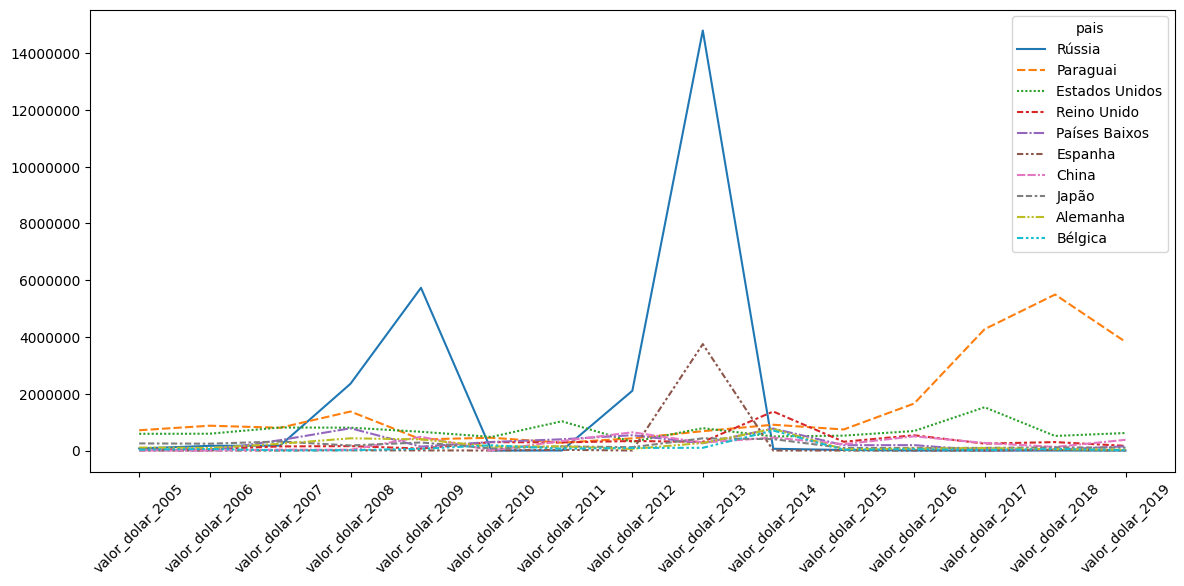

In [312]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.T)
plt.xticks(rotation=45)
plt.show()

In [313]:
dez_paises_por_valor.columns = [col.replace('valor_dolar_','') for col in dez_paises_por_valor.columns]

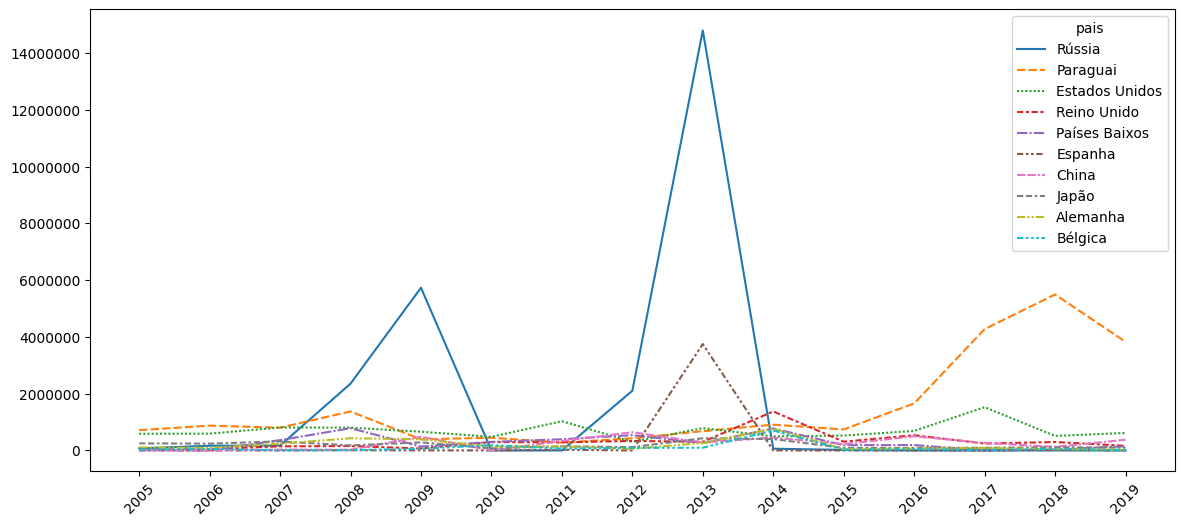

In [314]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.T)
plt.xticks(rotation=45)
plt.show()

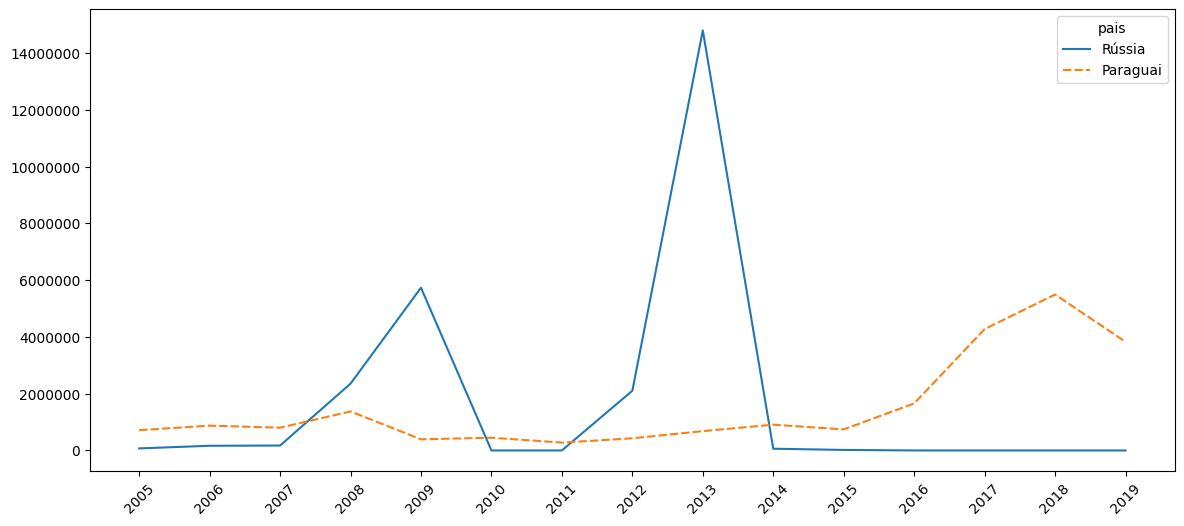

In [315]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.query('index in ["Rússia", "Paraguai"]').T)
plt.xticks(rotation=45)
plt.show()

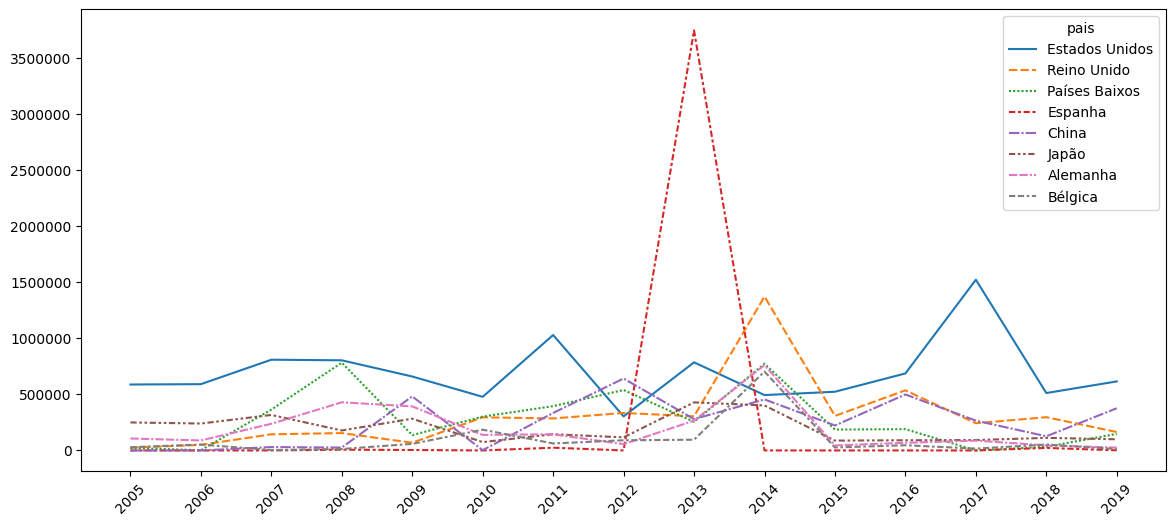

In [316]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.query('index not in ["Rússia", "Paraguai"]').T)
plt.xticks(rotation=45)
plt.show()

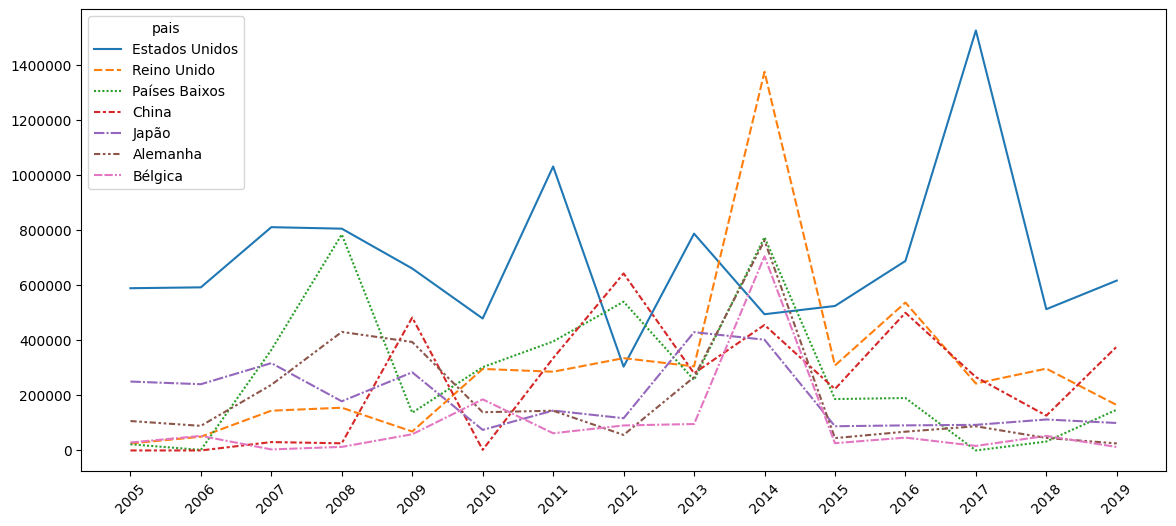

In [317]:
plt.figure(figsize=(14,6))
sns.lineplot(data=dez_paises_por_valor.query('index not in ["Rússia", "Paraguai", "Espanha"]').T)
plt.xticks(rotation=45)
plt.show()